# Data preparation

In [3]:
import numpy as np
import pandas as pd
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

#Import the data file. Apply a filter using loc to keep only respondents in profile 2 and 3, and all the symptom variables
#The bool_p3 variable is 1 if the subject is in class 3, and 0 otherwise
data = pd.read_excel("SHAP.xlsx", na_values = -99)
data = data.loc[(data["LPA_profile"]==2)|(data["LPA_profile"]==3),["bool_p3","PHQ9_1", "PHQ9_2", "PHQ9_3", "PHQ9_4", "PHQ9_5", "PHQ9_6", "PHQ9_7", "PHQ9_8", "PHQ9_9", "GAD7_1", "GAD7_2", "GAD7_3", "GAD7_4", "GAD7_5", "GAD7_6", "GAD7_7", "PCL5_1", "PCL5_2", "PCL5_3", "PCL5_4", "PHQ15_1", "PHQ15_2", "PHQ15_3", "PHQ15_4", "PHQ15_5", "PHQ15_6", "PHQ15_7", "PHQ15_8", "PHQ15_9", "PHQ15_10", "PHQ15_11", "PHQ15_12", "PHQ15_13", "PHQ15_14", "PHQ15_15", "AMIC_1", "AMIC_2", "AMIC_3", "AMIC_4", "AMIC_5", "CFQ_1", "CFQ_2", "CFQ_3", "CFQ_4", "CFQ_5", "CFQ_6", "CFQ_7", "CFQ_8", "CFQ_9", "CFQ_10", "CFQ_11"]]

#Separate labels and features from the dataset
labels = data['bool_p3']
features = data.drop('bool_p3', axis = 1)

#Train-test splitting
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
                                                                            test_size = 0.25, random_state = 1,
                                                                           stratify = labels)


# Creating a random forest model

For further information, please visit<br>
Koehrsen, W. (2018, January 10). *Hyperparameter tuning the random forest in python.* Medium. Retrieved April 26, 2023, from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74 

In [9]:
# Random Hyperparameter Grid
n_estimators = [int(x) for x in np.linspace(start=10, stop=300, num=30)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [1, 5, 10]
min_samples_leaf = [1, 5, 10]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Initialize a RandomForestRegressor
rf = RandomForestRegressor(random_state=20)

# Run the random search
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=500, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(train_features, train_labels)

# Print the best parameters and score for the random search
pprint(rf_random.best_params_)
pprint(rf_random.best_score_)

# Test accuracy for the best estimator
test_accuracy = rf_random.best_estimator_.score(test_features, test_labels)
pprint(test_accuracy)

# Create the parameter grid based on the results of the random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40],
    'max_features': ['auto'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
    'n_estimators': [30, 40, 50, 60, 70, 80, 90]
}

# Initialize a RandomForestRegressor
rf = RandomForestRegressor(random_state=20)

# Run the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(train_features, train_labels)

# Print the best parameters and score for the grid search
pprint(grid_search.best_params_)
pprint(grid_search.best_score_)

# Test accuracy for the best estimator
test_accuracy = grid_search.best_estimator_.score(test_features, test_labels)
pprint(test_accuracy)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  1.3min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 60}
0.7766879636141656
0.7931707412306486
Fitting 3 folds for each of 784 candidates, totalling 2352 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:   49.8s


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 90}
0.7810285606542752
0.7956861999457271


[Parallel(n_jobs=-1)]: Done 2352 out of 2352 | elapsed:   58.9s finished


# Making a logistic regression model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(train_features, train_labels)
print('Accuracy of logistic regression on unseen data:{:.4f}'.format(logreg.score(test_features, test_labels)))

Accuracy of logistic regression on unseen data:0.9048


# Calculating Shap values for the logistic regression model
For further information, please visit<br>
Shopenova, A. (2022, December 13). *How to understand your customers and interpret a black box model.* Medium. Retrieved April 26, 2023, from https://aigerimshopenova.medium.com/random-forest-classifier-and-shap-how-to-understand-your-customers-and-interpret-a-black-box-model-6166d86820d9 

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


    Feature  SHAP ratio
0    PCL5_2   11.544691
1    PCL5_1   10.121374
2    PCL5_3    6.354656
3    GAD7_6    5.956301
4    GAD7_4    5.509742
5     CFQ_8    3.453891
6    PHQ9_4    3.278827
7    GAD7_5    3.145077
8    GAD7_7    3.118155
9    PCL5_4    3.079509
10   CFQ_11    2.983217
11   GAD7_1    2.981561
12   AMIC_3    2.742363
13   PHQ9_2    2.673967
14   GAD7_3    2.589852
15  PHQ15_6    2.166543
16   PHQ9_5    2.157207
17    CFQ_9    2.017062
18  PHQ15_2    1.844519
19   PHQ9_1    1.823489
79.54200252237227


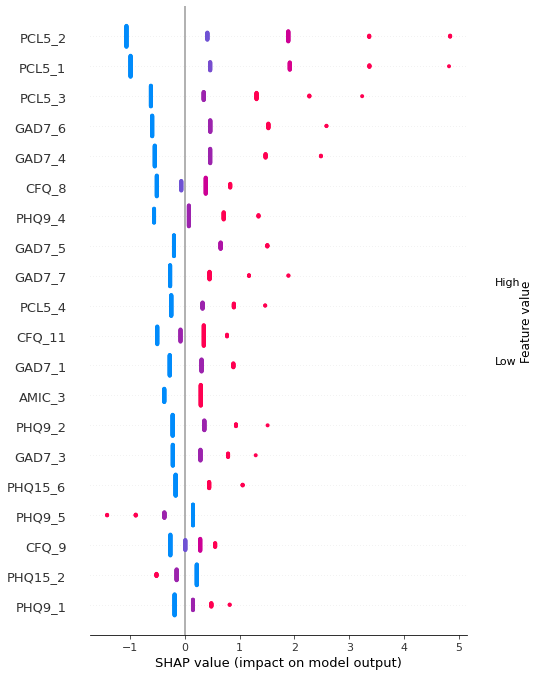

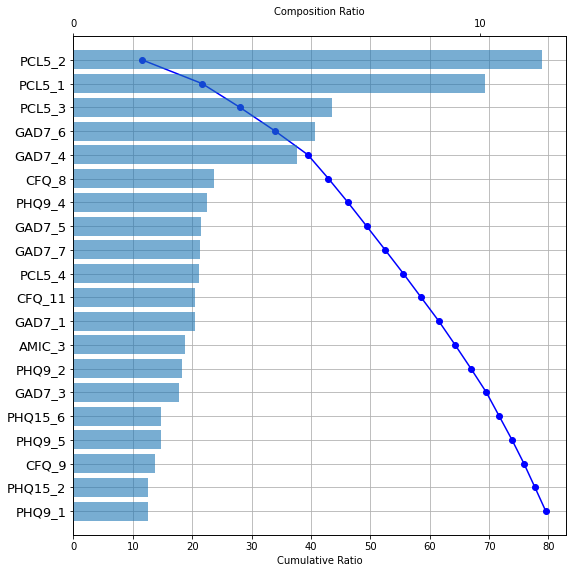

In [8]:
# import shap
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# from matplotlib import rc

import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SHAP
shap.initjs()
log_explainer = shap.LinearExplainer(logreg, train_features, feature_perturbation="interventional")
shap_values = log_explainer.shap_values(train_features)

# Create summary plot and save it
sum_plot = shap.summary_plot(shap_values, train_features, show=False)
plt.tight_layout()
plt.savefig('shap_2vs3_summary_1june.png', format='png', dpi=800)

# Define function to create waterfall plot
def make_shap_waterfall_plot(shap_values, features, num_display=20):
    column_list = features.columns
    feature_ratio = (np.abs(shap_values).sum(0) / np.abs(shap_values).sum()) * 100
    column_list = column_list[np.argsort(feature_ratio)[::-1]]
    feature_ratio_order = np.sort(feature_ratio)[::-1]
    cum_sum = np.cumsum(feature_ratio_order)
    column_list = column_list[:num_display]
    feature_ratio_order = feature_ratio_order[:num_display]
    cum_sum = cum_sum[:num_display]

    shap_df = pd.DataFrame({'Feature': column_list,
                            'SHAP ratio': feature_ratio_order})
    print(shap_df)
    print(cum_sum[-1])

    num_height = 0
    if (num_display >= 20) & (len(column_list) >= 20):
        num_height = (len(column_list) - 20) * 0.4

    fig, ax1 = plt.subplots(figsize=(8, 8 + num_height))
    ax1.plot(cum_sum[::-1], column_list[::-1], c='blue', marker='o')
    ax2 = ax1.twiny()
    ax2.barh(column_list[::-1], feature_ratio_order[::-1], alpha=0.6)

    ax1.grid(True)
    ax2.grid(False)
    ax1.set_xticks(np.arange(0, round(cum_sum.max(), -1) + 1, 10))
    ax2.set_xticks(np.arange(0, round(feature_ratio_order.max(), -1) + 1, 10))
    ax1.set_xlabel('Cumulative Ratio')
    ax2.set_xlabel('Composition Ratio')
    ax1.tick_params(axis="y", labelsize=13)
    plt.ylim(-1, len(column_list))
    plt.rcParams['font.family'] = ['Arial']
    plt.rcParams['font.size'] = 8
    plt.tight_layout()
    plt.savefig('shap_2vs3_waterfall_1June22.png', format='png', dpi=800)

# Create waterfall plot
make_shap_waterfall_plot(shap_values, train_features, num_display=20)